In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
df=pd.read_csv("fer2013.csv")
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [6]:
def parse_pixels(pixel_string):
    pixels = np.array(pixel_string.split(), dtype='int')
    image = pixels.reshape((48, 48,1))  
    return image
df['image'] = df['pixels'].apply(parse_pixels)

In [7]:
df

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


In [8]:
images = np.stack(df['image'].values) / 255.0 
df 

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


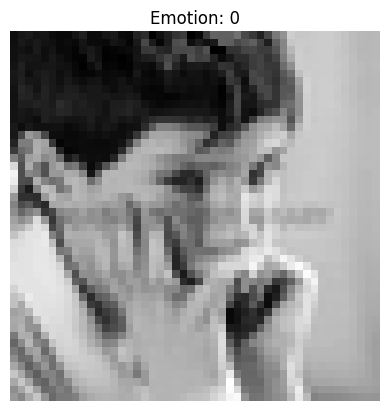

In [9]:
import matplotlib.pyplot as plt
sample_image = df['image'].iloc[3]
plt.imshow(sample_image.reshape(48, 48), cmap='gray')
plt.title(f"Emotion: {df['emotion'].iloc[0]}")
plt.axis('off')
plt.show()


In [10]:
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = df[df['Usage']=='Training']
test_data = df[df['Usage']=='PublicTest']

train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)


In [12]:
train_generator = train_data_gen.flow(
    x=np.stack(train_data['image'].values),  
    y=pd.get_dummies(train_data['emotion']),  
    batch_size=64,
    shuffle=True
)
validation_generator = test_data_gen.flow(
    x=np.stack(test_data['image'].values),
    y=pd.get_dummies(test_data['emotion']),
    batch_size=64,
    shuffle=False  
)

print("Training data shape:", train_data.shape)
print("Testing/validation data shape:", test_data.shape)


Training data shape: (28709, 4)
Testing/validation data shape: (3589, 4)


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json


emotion_model_1 = Sequential() 
  
emotion_model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  
                         input_shape=(48, 48, 1))) 
emotion_model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Dropout(0.25)) 
  
emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Dropout(0.25)) 
  
emotion_model_1.add(Flatten()) 
emotion_model_1.add(Dense(1024, activation='relu')) 
emotion_model_1.add(Dropout(0.5)) 
emotion_model_1.add(Dense(7, activation='softmax')) 
  
emotion_model_1.summary() 
  
cv2.ocl.setUseOpenCL(False) 
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,  
                               decay_rate=0.96) 
  
optimizer = Adam(learning_rate=lr_schedule) 
  
emotion_model_1.compile(loss='categorical_crossentropy', optimizer=optimizer,  
                      metrics=['accuracy']) 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [11]:
history = emotion_model_1.fit( 
    train_generator, 
    steps_per_epoch=28709//64,  # Number of batches per epoch (total training samples // batch size)
    epochs=10,                   # Number of epochs (complete passes through the dataset)
    validation_data=validation_generator, 
    validation_steps=3589//64    # Number of batches for validation (total validation samples // batch size)
)

emotion_model_1.evaluate(validation_generator)

Epoch 1/10


448/448 [==============================] - 61s 133ms/step - loss: 1.7964 - accuracy: 0.2668 - val_loss: 1.6976 - val_accuracy: 0.3502
Epoch 2/10
448/448 [==============================] - 78s 174ms/step - loss: 1.6315 - accuracy: 0.3662 - val_loss: 1.5427 - val_accuracy: 0.4102
Epoch 3/10
448/448 [==============================] - 65s 146ms/step - loss: 1.5353 - accuracy: 0.4072 - val_loss: 1.4609 - val_accuracy: 0.4459
Epoch 4/10
448/448 [==============================] - 63s 141ms/step - loss: 1.4635 - accuracy: 0.4382 - val_loss: 1.4056 - val_accuracy: 0.4688
Epoch 5/10
448/448 [==============================] - 65s 144ms/step - loss: 1.4084 - accuracy: 0.4636 - val_loss: 1.3499 - val_accuracy: 0.4947
Epoch 6/10
448/448 [==============================] - 106s 237ms/step - loss: 1.3556 - accuracy: 0.4864 - val_loss: 1.3234 - val_accuracy: 0.5045
Epoch 7/10
448/448 [==============================] - 65s 145ms/step - loss: 1.3116 - accuracy: 0.4996 - val_loss: 1.2824 - val

[1.2196996212005615, 0.5366397500038147]

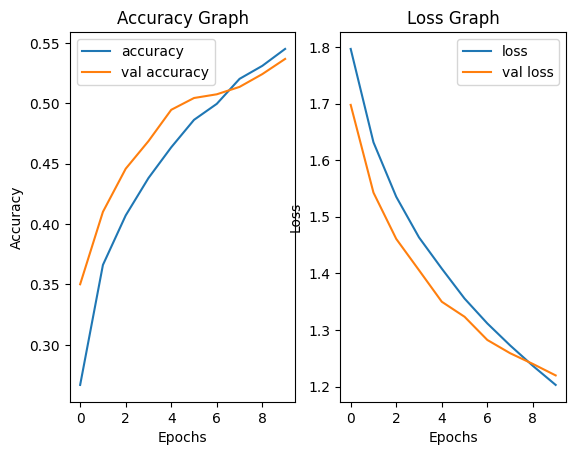

In [12]:
accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt 

# Accuracy graph 
plt.subplot(1, 2, 1) 
plt.plot(accuracy, label='accuracy') 
plt.plot(val_accuracy, label='val accuracy') 
plt.title('Accuracy Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 

# Loss graph 
plt.subplot(1, 2, 2) 
plt.plot(loss, label='loss') 
plt.plot(val_loss, label='val loss') 
plt.title('Loss Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

plt.show() 


In [13]:
emotion_model_1.save('emotion_model_1.h5')


c:\Users\kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model 2


In [13]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2

In [14]:
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
df['emotion_label'] = df['emotion'].map(emotion_map)
df

,emotion,pixels,Usage,image,emotion_label
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6...",Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1...",Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1...",Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2...",Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],...",Neutral
...,...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3...",Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1...",Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1...",Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6...",Happy


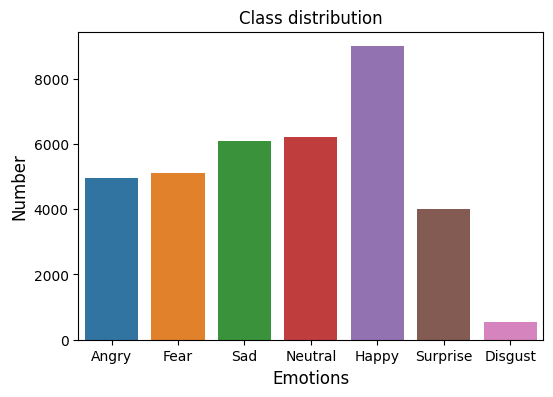

In [15]:
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x= emotion_counts.emotion, y = emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [16]:
df= df[df['emotion_label'] != 'Disgust']
df.emotion_label.value_counts()

emotion_label
Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Name: count, dtype: int64

In [19]:
data=df.drop('emotion_label',axis=1)
data

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


In [27]:
data.to_csv('data.csv')


In [25]:
num_classes = 7 
width, height = 48, 48
num_epochs = 50
batch_size = 64
num_features = 64
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam


# Initialize the model
model = Sequential()

# Module 1
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), input_shape=(width, height, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Module 2
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Module 3
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(2*2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization_9 (Bat  (None, 46, 46, 256)       1024      
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 46, 46, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 256)       590080    
                                                                 
 batch_normalization_10 (Ba  (None, 46, 46, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 46, 46, 256)      

In [26]:
# Assuming you have `train_generator` and `validation_generator` defined
history1 = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')


Epoch 1/10
 96/449 [=====>........................] - ETA: 15:41 - loss: 1.8284 - accuracy: 0.2804

KeyboardInterrupt: 